In [24]:
#import requried lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
#Load the dataset
data = pd.read_csv('Datasets.csv')
data.head()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,9,0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,10,0,0.0
2,2,1,181.00,181.0,0.00,0.0,0.0,2,0,1.0
3,3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0
4,4,1,11668.14,41554.0,29885.86,0.0,0.0,17,0,0.0


In [27]:
data.shape

(10127, 10)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10127 non-null  int64  
 1   step            10127 non-null  int64  
 2   amount          10125 non-null  float64
 3   oldbalanceOrg   10125 non-null  float64
 4   newbalanceOrig  10127 non-null  float64
 5   oldbalanceDest  10126 non-null  float64
 6   newbalanceDest  10125 non-null  float64
 7   unusuallogin    10127 non-null  int64  
 8   isFlaggedFraud  10127 non-null  int64  
 9   isFraud         10125 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 791.3 KB


In [29]:
data.isna().sum()

Unnamed: 0        0
step              0
amount            2
oldbalanceOrg     2
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    2
unusuallogin      0
isFlaggedFraud    0
isFraud           2
dtype: int64

In [30]:
df=data.fillna(method='bfill')
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0   step  amount  oldbalanceOrg  newbalanceOrig  \
0           False  False   False          False           False   
1           False  False   False          False           False   
2           False  False   False          False           False   
3           False  False   False          False           False   
4           False  False   False          False           False   
...           ...    ...     ...            ...             ...   
10122       False  False   False          False           False   
10123       False  False   False          False           False   
10124       False  False   False          False           False   
10125       False  False   False          False           False   
10126       False  False   False          False           False   

       oldbalanceDest  newbalanceDest  unusuallogin  isFlaggedFraud  isFraud  
0               False           False         False   

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>],
       [<Axes: title={'center': 'newbalanceDest'}>,
        <Axes: title={'center': 'unusuallogin'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>],
       [<Axes: title={'center': 'isFraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

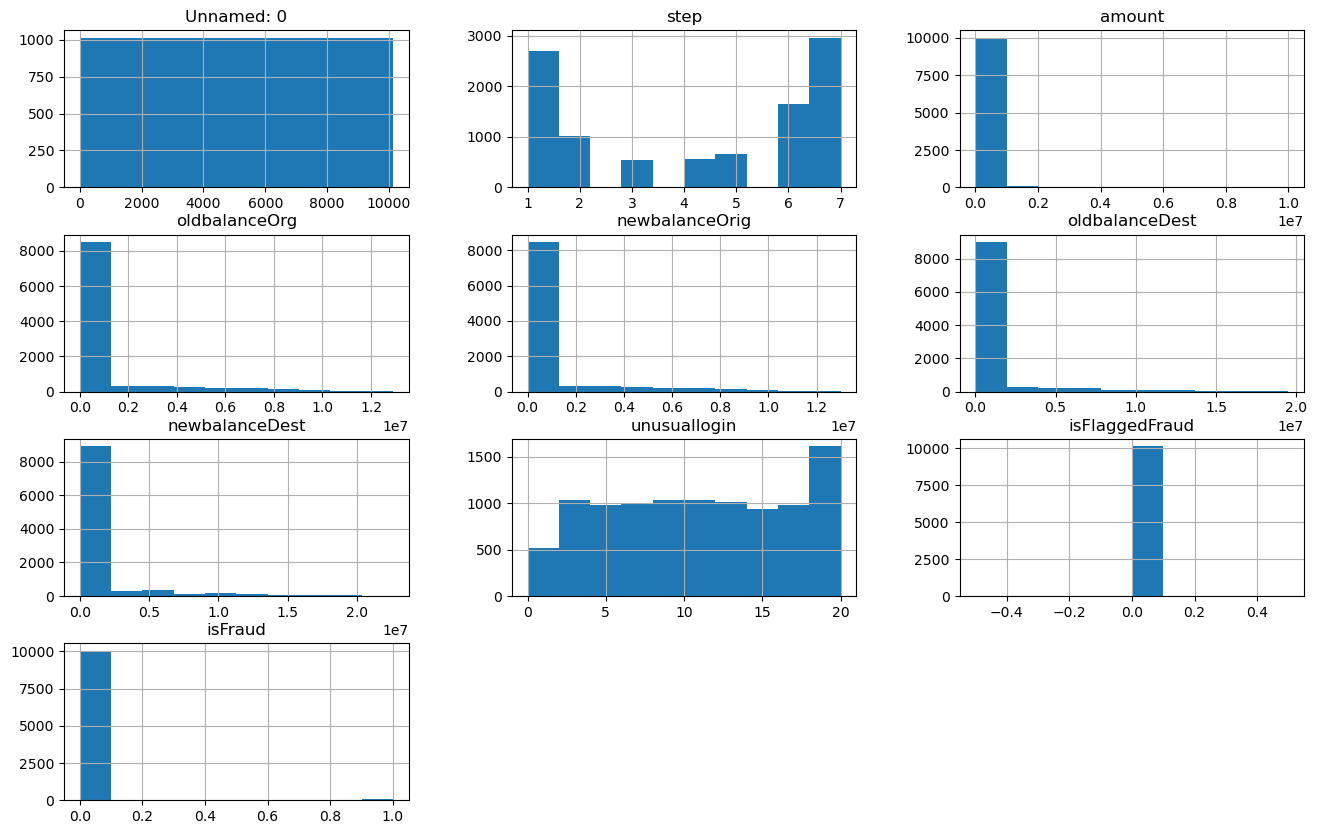

In [31]:
df.hist(figsize=(16,10))

<Axes: >

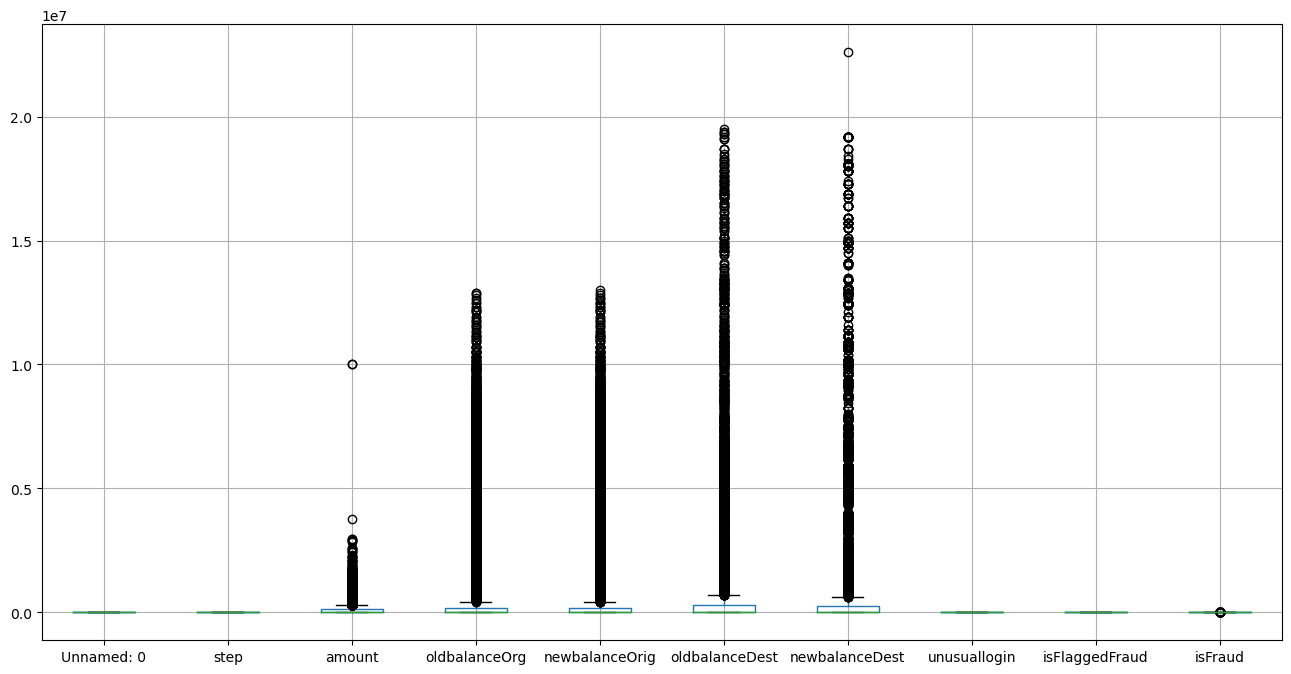

In [32]:
df.boxplot(figsize=(16,8))

<Axes: >

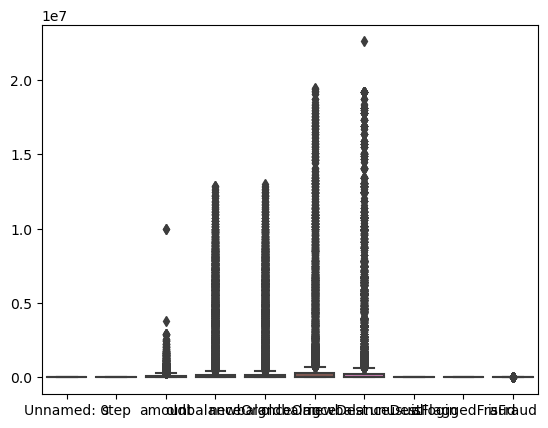

In [33]:
sns.boxplot(df)

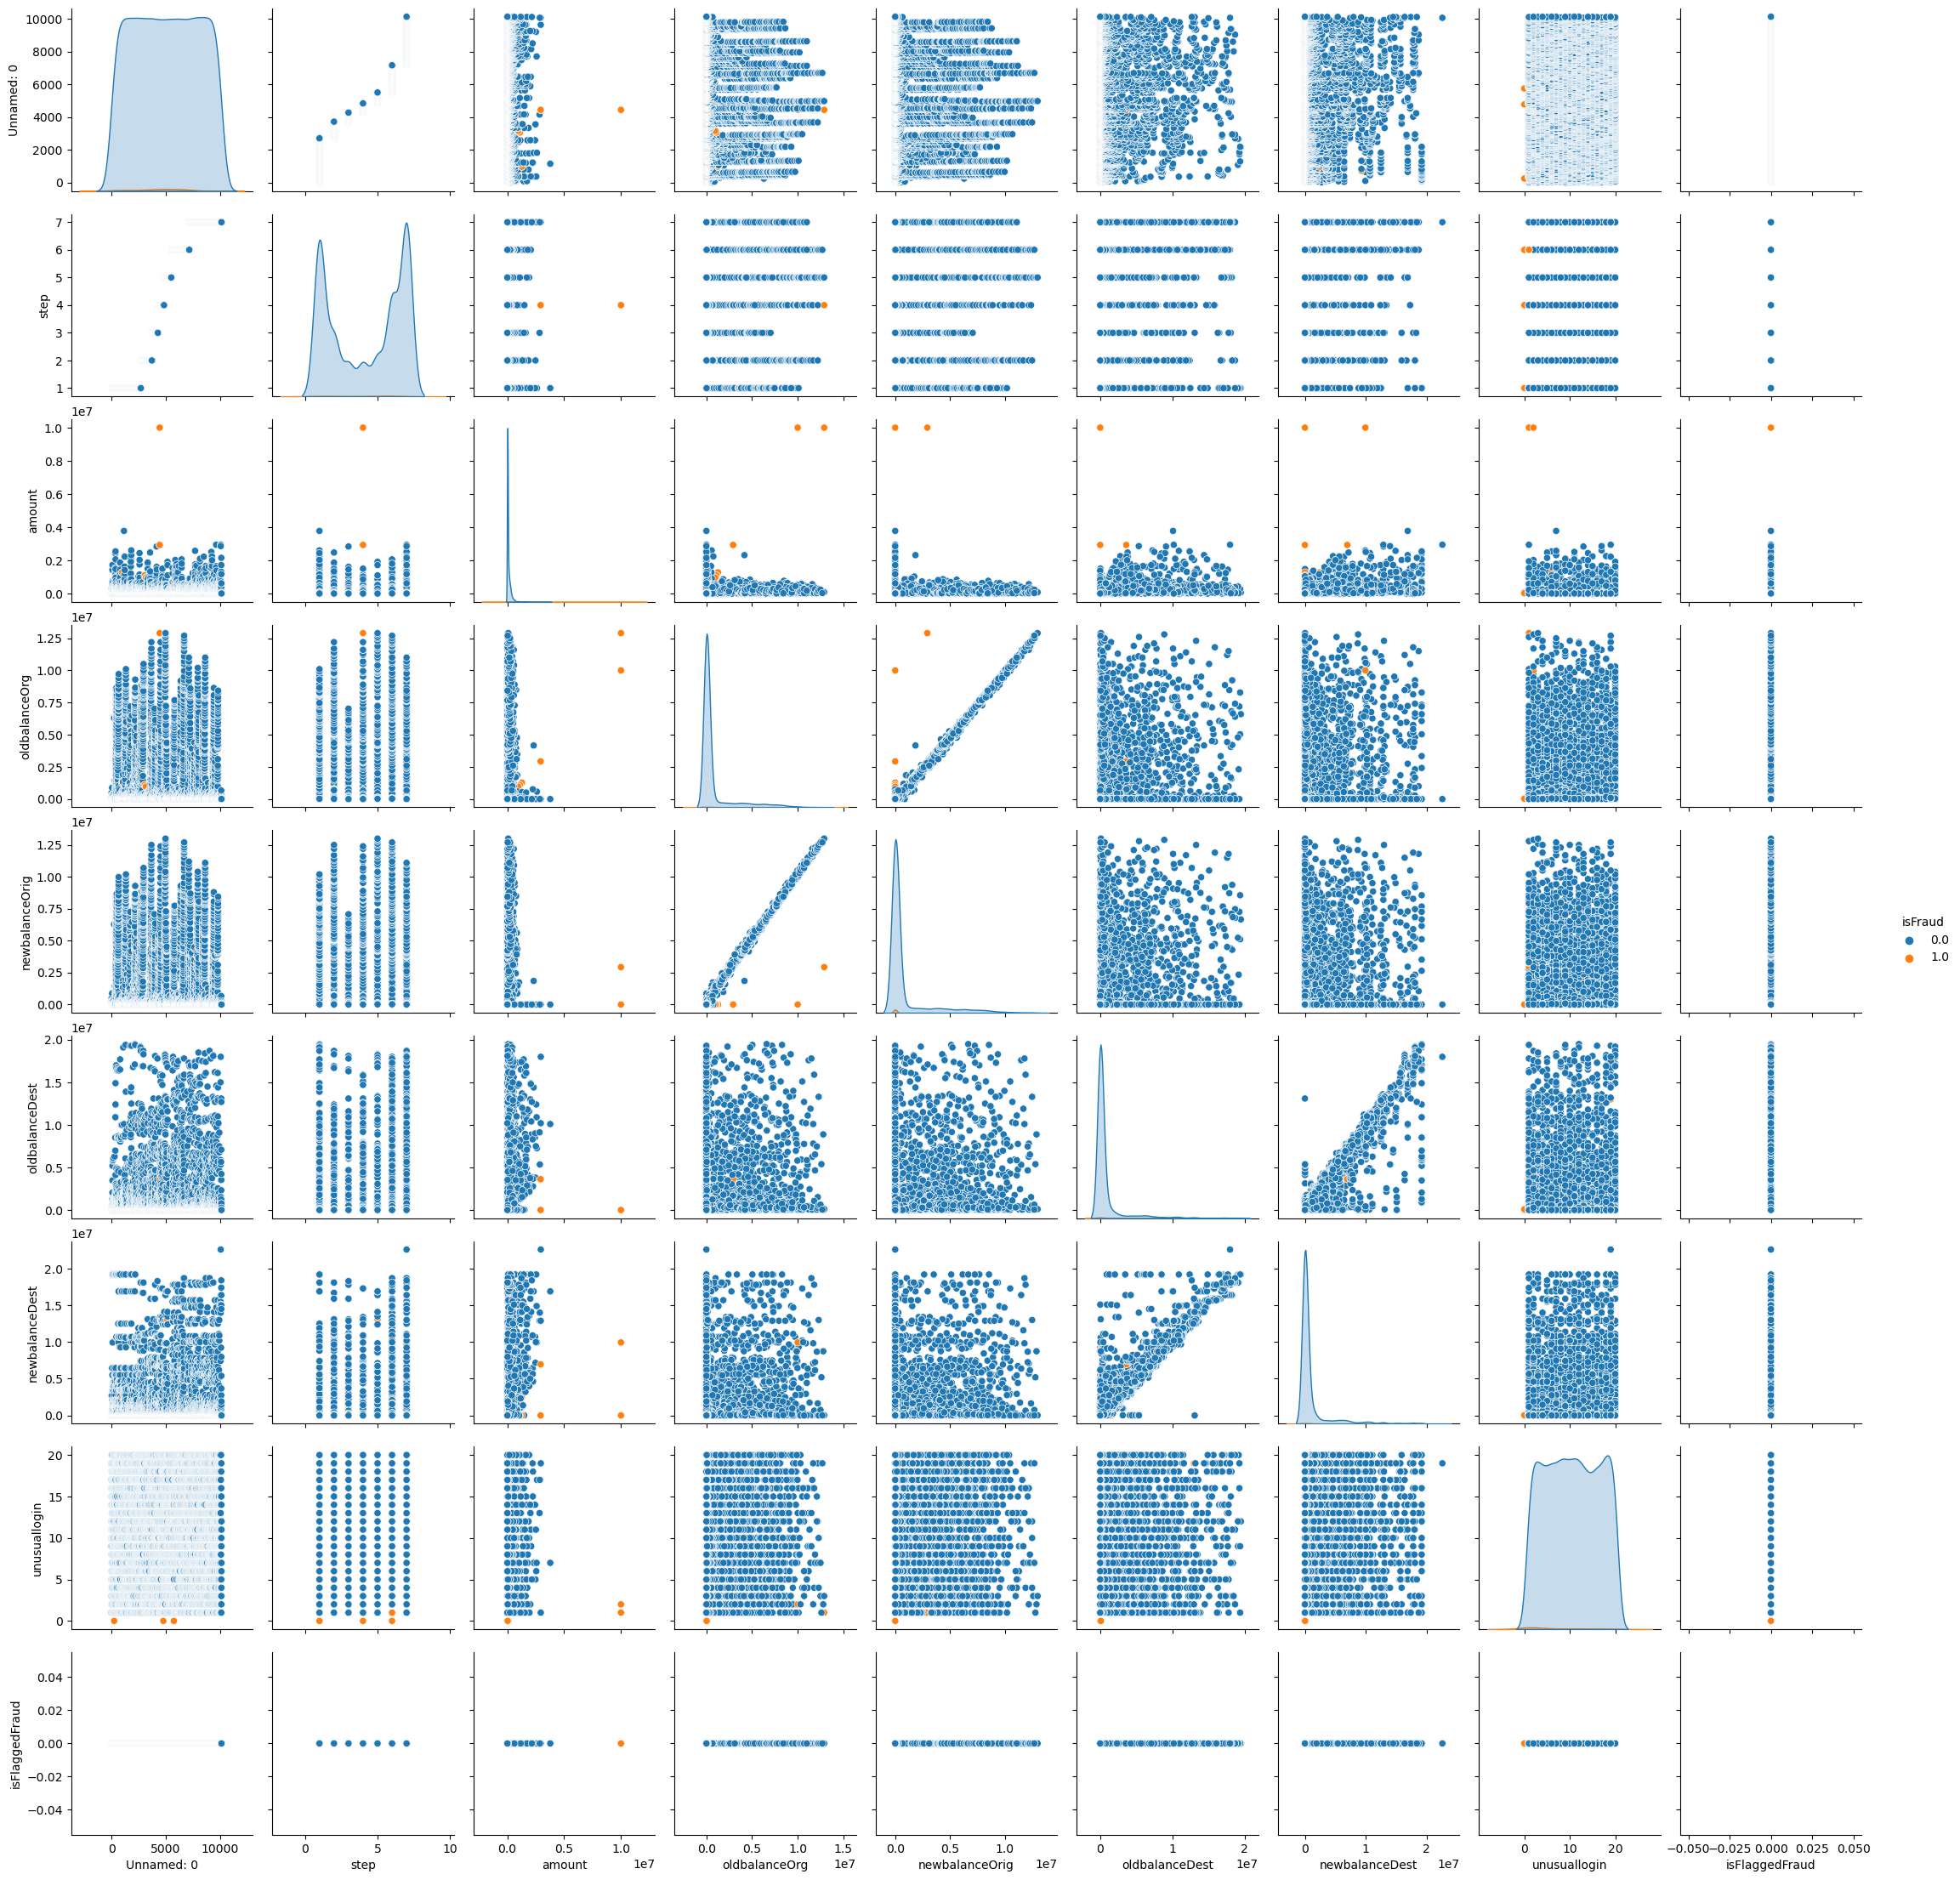

In [35]:
sns.pairplot(df,hue='isFraud')

In [36]:
x=df.iloc[:,:-1]
y = df.iloc[:,-1:]
print(x.head(2))
print(y.head(2))

   Unnamed: 0  step   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           0     1  9839.64       170136.0       160296.36             0.0   
1           1     1  1864.28        21249.0        19384.72             0.0   

   newbalanceDest  unusuallogin  isFlaggedFraud  
0             0.0             9               0  
1             0.0            10               0  
   isFraud
0      0.0
1      0.0


<Axes: ylabel='count'>

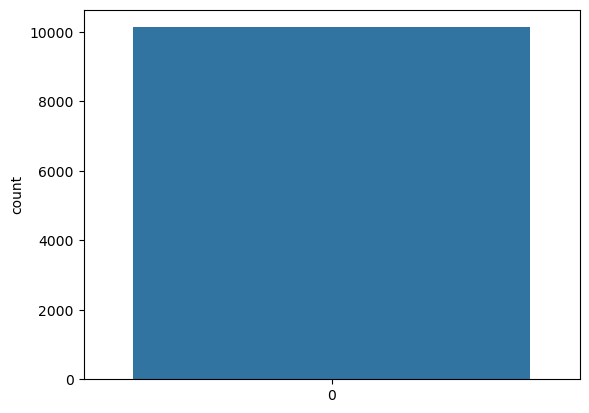

In [37]:
sns.countplot(df['isFraud'])

In [38]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.25, random_state=2)

print('Training data for x-axis Shape:\t',xtrain.shape)
print()
print('Training data for y-axis shape:\t',ytrain.shape)
print()
print('***************Testing data Shape*********************\n')
print()
print('Testing data Shape\t',xtest.shape)
print()
print('Testing data Shape\t',xtrain.shape)

Training data for x-axis Shape:	 (7595, 9)

Training data for y-axis shape:	 (7595, 1)

***************Testing data Shape*********************


Testing data Shape	 (2532, 9)

Testing data Shape	 (7595, 9)


In [39]:
#invoke the log reg algo from sklearn
log_reg=LogisticRegression(solver='liblinear')

#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)

#Test the model

ypred= log_reg.predict(xtest)
print('Predicted Lable for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing Samples are : \t',len(ypred))

Training the model



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Lable for the input samples:
 [0. 0. 0. ... 0. 0. 0.]

Testing is completed

Testing Samples are : 	 2532


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



print('*************Performance measures for Logstic regression*************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classificatino report: \n',classification_report(ytest,ypred))

*************Performance measures for Logstic regression*************
Accuracy Score:	
 0.9928909952606635

Confussinon matrix:
 [[2510   11]
 [   7    4]]

Classificatino report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2521
         1.0       0.27      0.36      0.31        11

    accuracy                           0.99      2532
   macro avg       0.63      0.68      0.65      2532
weighted avg       0.99      0.99      0.99      2532



In [41]:
df['isFraud'].value_counts()

0.0    10059
1.0       68
Name: isFraud, dtype: int64

In [45]:
log_reg.classes_

array([0., 1.])

In [46]:
log_reg.coef_

array([[-1.92234787e-04, -1.61333774e-07, -5.10988162e-05,
         7.25599768e-05, -1.44986527e-04, -9.88593997e-07,
         6.25579389e-08, -4.45324295e-07,  0.00000000e+00]])

In [47]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([1.32760014e-008, 3.28395839e-001, 5.75043843e-005, ...,
       3.61514284e-005, 1.79352652e-008, 9.28262995e-152])

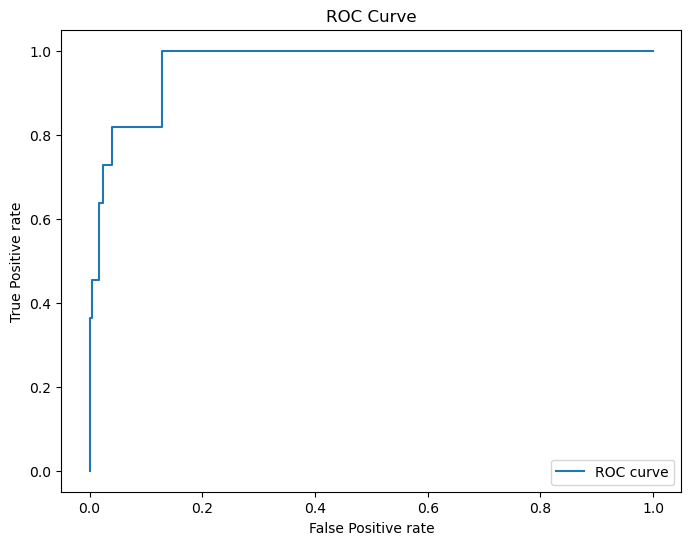

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
#Cslculate ROC and Auc 
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_curve= auc(fpr,tpr)


#Plot Roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [50]:
roc_curve

0.9671126176481194

In [51]:
cm=confusion_matrix(ytest,ypred)
cm

array([[2510,   11],
       [   7,    4]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

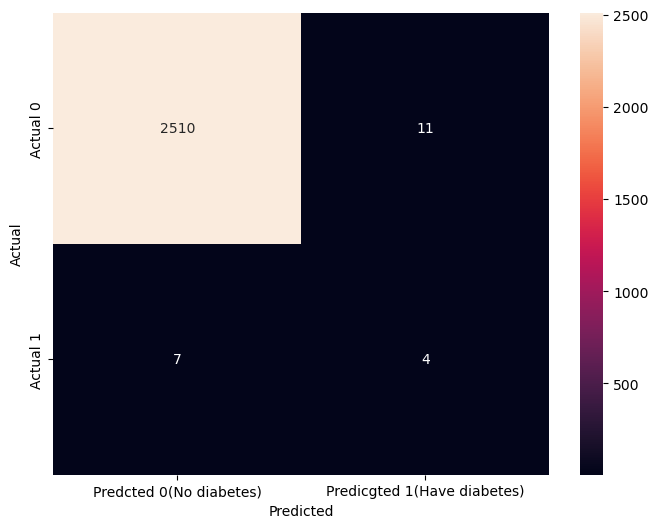

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Predcted 0(No diabetes)','Predicgted 1(Have diabetes)'], yticklabels=["Actual 0",'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [53]:
df['isFraud'].value_counts()

0.0    10059
1.0       68
Name: isFraud, dtype: int64